In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

import sys

sys.path.append("../")
import loss_functions as ls
import utils as ut
from models import Model
from layers import Linear, Flatten
from activation_functions import Sigmoid, ReLU, Tanh

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
from collections import Counter

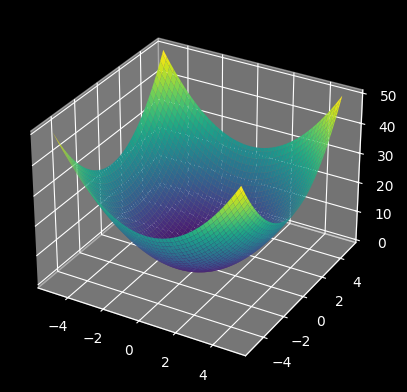

Linear Layer (in 2, out 24), (activation tanh)
Linear Layer (in 24, out 64), (activation tanh)
Linear Layer (in 64, out 24), (activation tanh)
Linear Layer (in 24, out 1), (activation tanh)


In [7]:
# Generate dummy data for regression
# Generate simple 3D dummy data for regression
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = x**2 + y**2  # Simple paraboloid function for regression

# Visualize the data
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, cmap="viridis")
plt.show()

# Flatten the data for training
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

# Combine x_flat and y_flat into input features
X = np.column_stack((x_flat, y_flat))

# Split into training and testing sets
X_train, X_test, z_train, z_test = train_test_split(
    X, z_flat, test_size=0.2, random_state=42
)

model = Model(ls.mse)
model.add(Linear(2, 24, Tanh()))
model.add(Linear(24, 64, Tanh()))
model.add(Linear(64, 24, Tanh()))
model.add(Linear(24, 1, Tanh()))
print(model)

In [8]:
# z values are your targets

z_train = z_train.reshape(-1, 1)  # Reshape from (8000,) to (8000, 1)
z_test = z_test.reshape(-1, 1)  # Reshape from (2000,) to (2000, 1)

print(f"Shapes are {X_train.shape}, {z_train.shape}")
print(f"Target shapes are {X_test.shape}, {z_test.shape}")

loss = model.fit(train_data=(X_train, z_train), epochs=5, lr=0.01)

Shapes are (8000, 2), (8000, 1)
Target shapes are (2000, 2), (2000, 1)
Training epoch 0
Epoch 0 loss -> 11712.67662507254
Training epoch 1
Epoch 1 loss -> 11685.35841360234
Training epoch 2
Epoch 2 loss -> 11704.223716306651
Training epoch 3
Epoch 3 loss -> 11701.500702955753
Training epoch 4
Epoch 4 loss -> 11680.983479199745


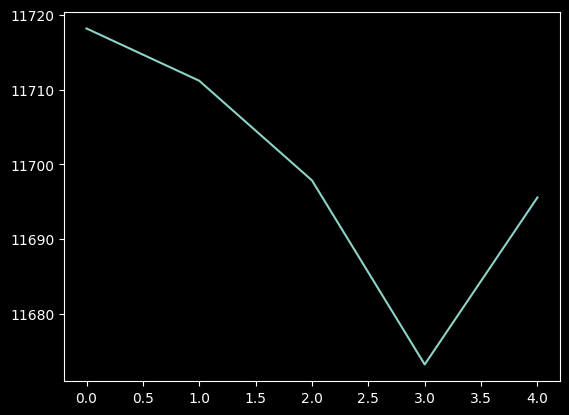

In [6]:
plt.plot(loss["train"], label="Train Loss")
plt.plot(loss["val"], label="Validation Loss")

In [5]:
print(f"Test Size: {len(X_test)}")
predictions = []
for batch in X_test:
    predictions.append(model.predict(batch.reshape(1, -1)))
predictions = np.array(predictions)
predictions = np.squeeze(predictions)

print(predictions.shape, y_test.shape)

Test Size: 2000


NameError: name 'y_test' is not defined

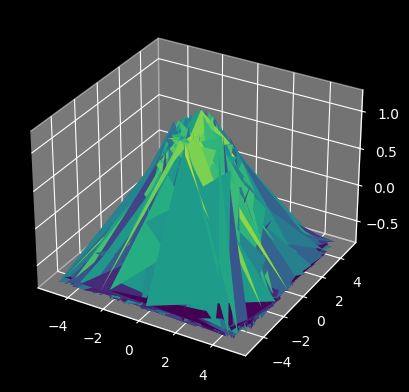

In [ ]:
# Determine the correct grid dimensions
grid_size = int(np.sqrt(len(X_test)))
new_size = grid_size**2

# Truncate X_test and predictions to make their lengths a perfect square
X_test_truncated = X_test[:new_size]
predictions_truncated = predictions[:new_size]

# Reshape X_test and predictions to match the grid format
x_test_grid = X_test_truncated[:, 0].reshape(grid_size, grid_size)
y_test_grid = X_test_truncated[:, 1].reshape(grid_size, grid_size)
z_pred_grid = predictions_truncated.reshape(grid_size, grid_size)

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x_test_grid, y_test_grid, z_pred_grid, cmap="viridis")
plt.show()